In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

* Считываем датасет из csv файла, попутно выкидывая лишние столбцы

In [41]:
df = pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\Tasks\06. Логистическая регрессия\data.csv')
df = df.iloc[:,:-1]
df = df.drop('id', axis=1)

In [42]:
# Датасет, состоит из 31 столбца и 569 объектов
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


* Посмотрим информацию о датасете
    * Можно заметить, пропусков в данных нет, а diagnosis - не числовая фича, посмотрим на нее поближе

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

* Нашли целевую переменную, в которой соотношение классов 1 к 2, можно считать что дисбаланса классов нет

* Значения целевой переменной: M = malignant/Злокачественная, B = benign/Доброкачественная

In [44]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

* Перекодируем таргет в числовой формат, 0 - Доброкачественная, 1 - Злокачественная

In [45]:
df.diagnosis = [0 if i == 'B' else 1 for i in df.diagnosis]
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

* Ещё раз взглянем на распределение целевой переменной

<AxesSubplot: xlabel='diagnosis', ylabel='Count'>

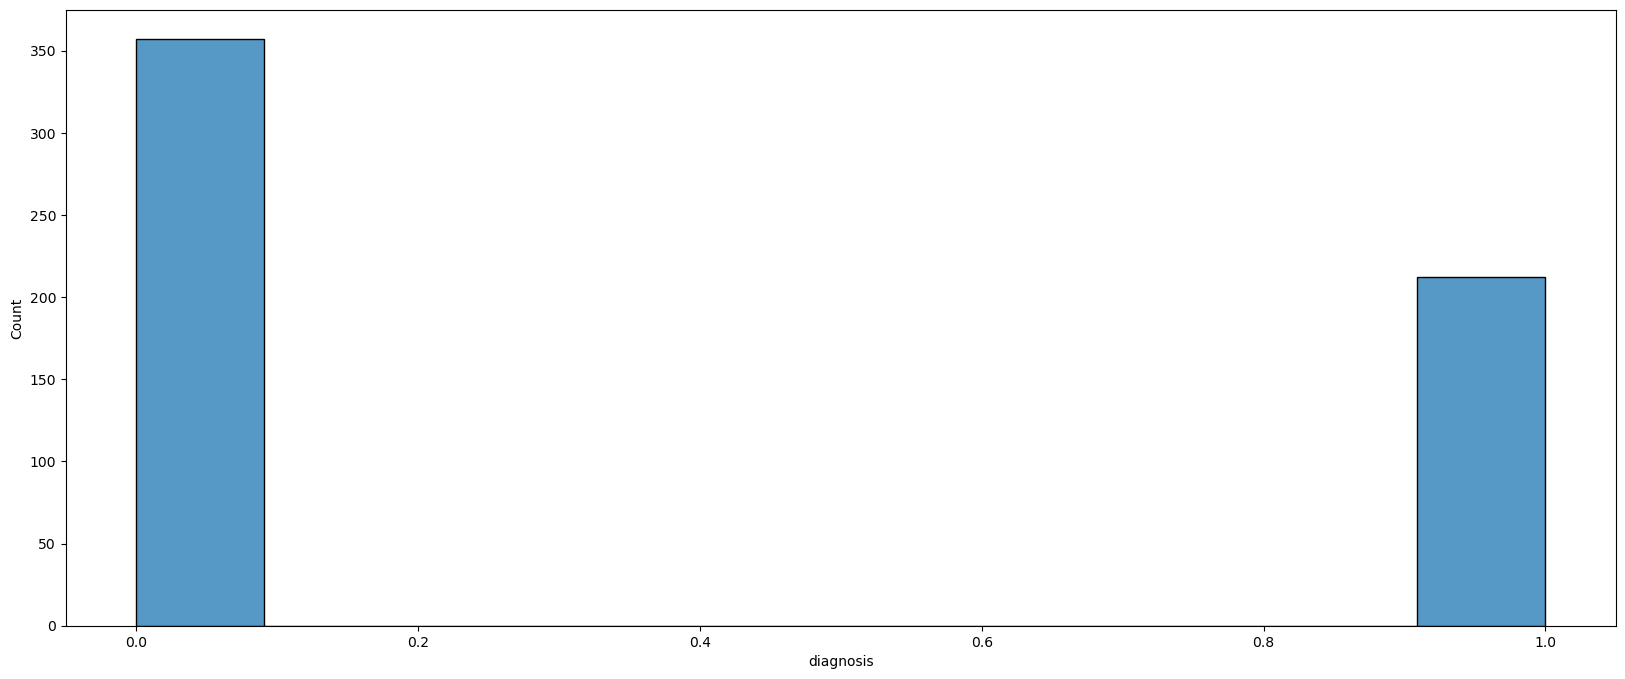

In [46]:
sns.histplot(data=df.diagnosis)

* Посмотрим на коэффициент корреляции переменных друг с другом

* Видно, что много переменных имеют сильную корреляцию (>0.85) с другими переменными
* В таком случае имеет смысл избавиться от сильно закорелированных столбцов - от мультиколлиниарности
    * Если этого не сделать, модель может сильно переобучиться, давая большой приоритет одинаковым столбцам
    * Может получиться ситуация, когда модель, например, даст приоритет одному столбцу 0.3, и столько же каждому столбцу, кто с ним сильно закоррелирован, это равносильно тому, что модель даст одному столбцу приоритет 0.3 * 10

In [47]:
df_corr = df.corr()
df_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [48]:
# функция удаляет столбцы, чей коэффициент корреляции с другим столбцом выше чем 0.85
def crashLinear(df):
    counter = 0
    df_cut = df
    flag = False 
    for i in range(1, df.shape[1]):
        for j in range(df.shape[1]):
            if i != j:
                df_corr = df.corr()
                if df_corr.iloc[i,j] >= 0.85:
                    counter += 1
                    list_columns = df_cut.columns
                    if j >= len(list_columns):
                        flag = True
                        break
                    df_cut = df_cut.drop(list_columns[j], axis=1)
                    df_corr = df.corr()
        if flag:
            break
        
    return df_cut

* После использования функции, в датасете осталось лишь 11 столбцов

In [49]:
df_cut = df
df_cut = crashLinear(df)
df_cut = crashLinear(df_cut)
df_cut

,diagnosis,texture_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,compactness_se,symmetry_se,fractal_dimension_se,area_worst,concavity_worst
0,1,10.38,0.27760,0.14710,0.2419,0.07871,0.04904,0.03003,0.006193,2019.0,0.7119
1,1,17.77,0.07864,0.07017,0.1812,0.05667,0.01308,0.01389,0.003532,1956.0,0.2416
2,1,21.25,0.15990,0.12790,0.2069,0.05999,0.04006,0.02250,0.004571,1709.0,0.4504
3,1,20.38,0.28390,0.10520,0.2597,0.09744,0.07458,0.05963,0.009208,567.7,0.6869
4,1,14.34,0.13280,0.10430,0.1809,0.05883,0.02461,0.01756,0.005115,1575.0,0.4000
...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,0.11590,0.13890,0.1726,0.05623,0.02891,0.01114,0.004239,2027.0,0.4107
565,1,28.25,0.10340,0.09791,0.1752,0.05533,0.02423,0.01898,0.002498,1731.0,0.3215
566,1,28.08,0.10230,0.05302,0.1590,0.05648,0.03731,0.01318,0.003892,1124.0,0.3403
567,1,29.33,0.27700,0.15200,0.2397,0.07016,0.06158,0.02324,0.006185,1821.0,0.9387


* Посмотрим на коэффициент корреляции оставшихся столбцов
* Видно, что все коэффициенты меньше 0.85, не считая главной диагонали

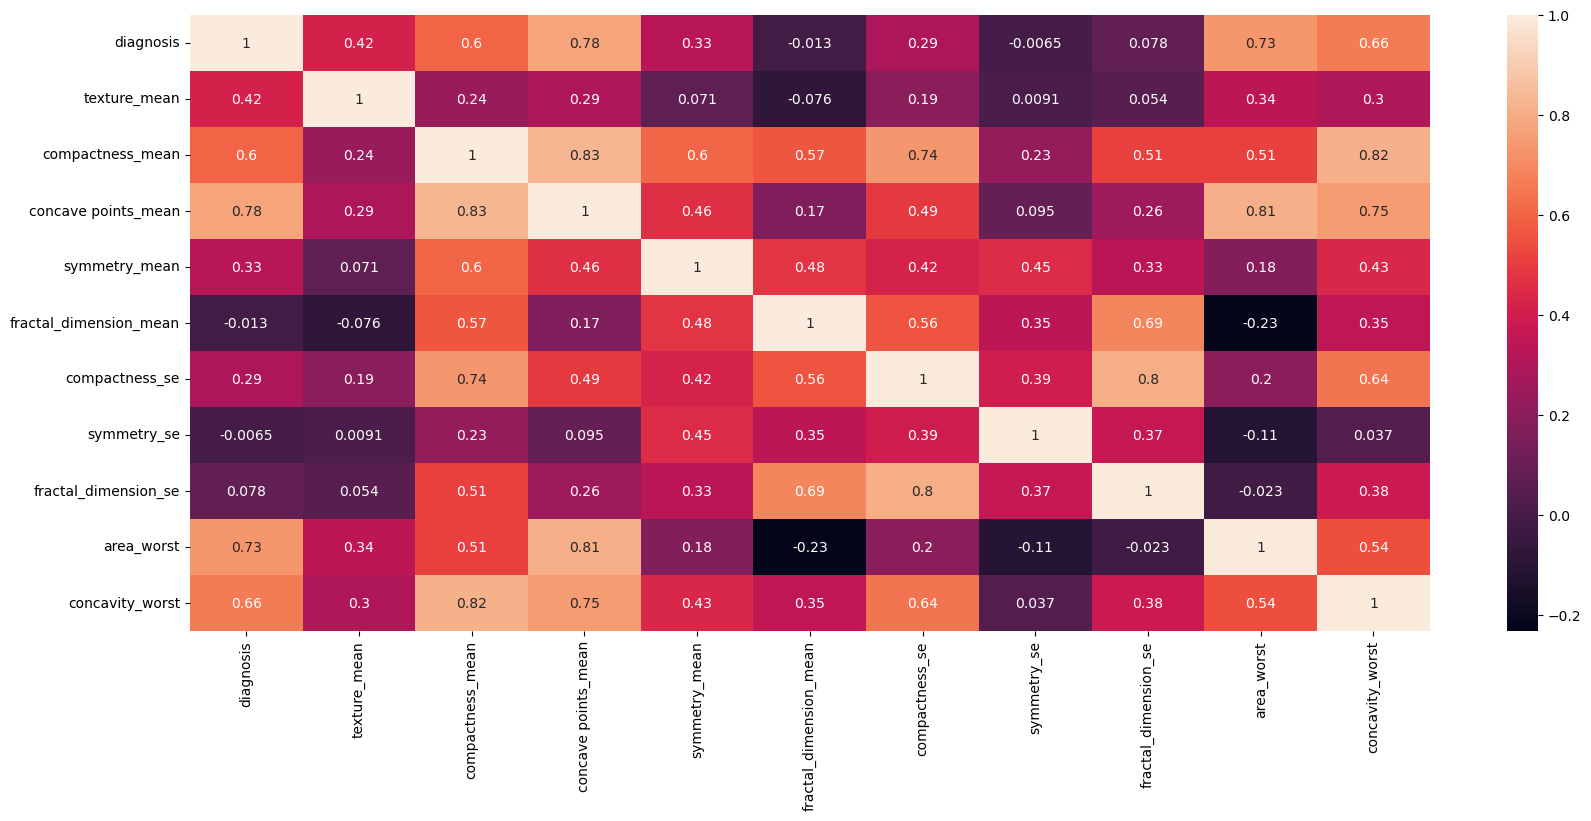

In [50]:
sns.heatmap(df_cut.corr(), annot=True);

* Взглянем на ScatterPlot для всех фичей, раскрасив точки в цвета целевой переменной

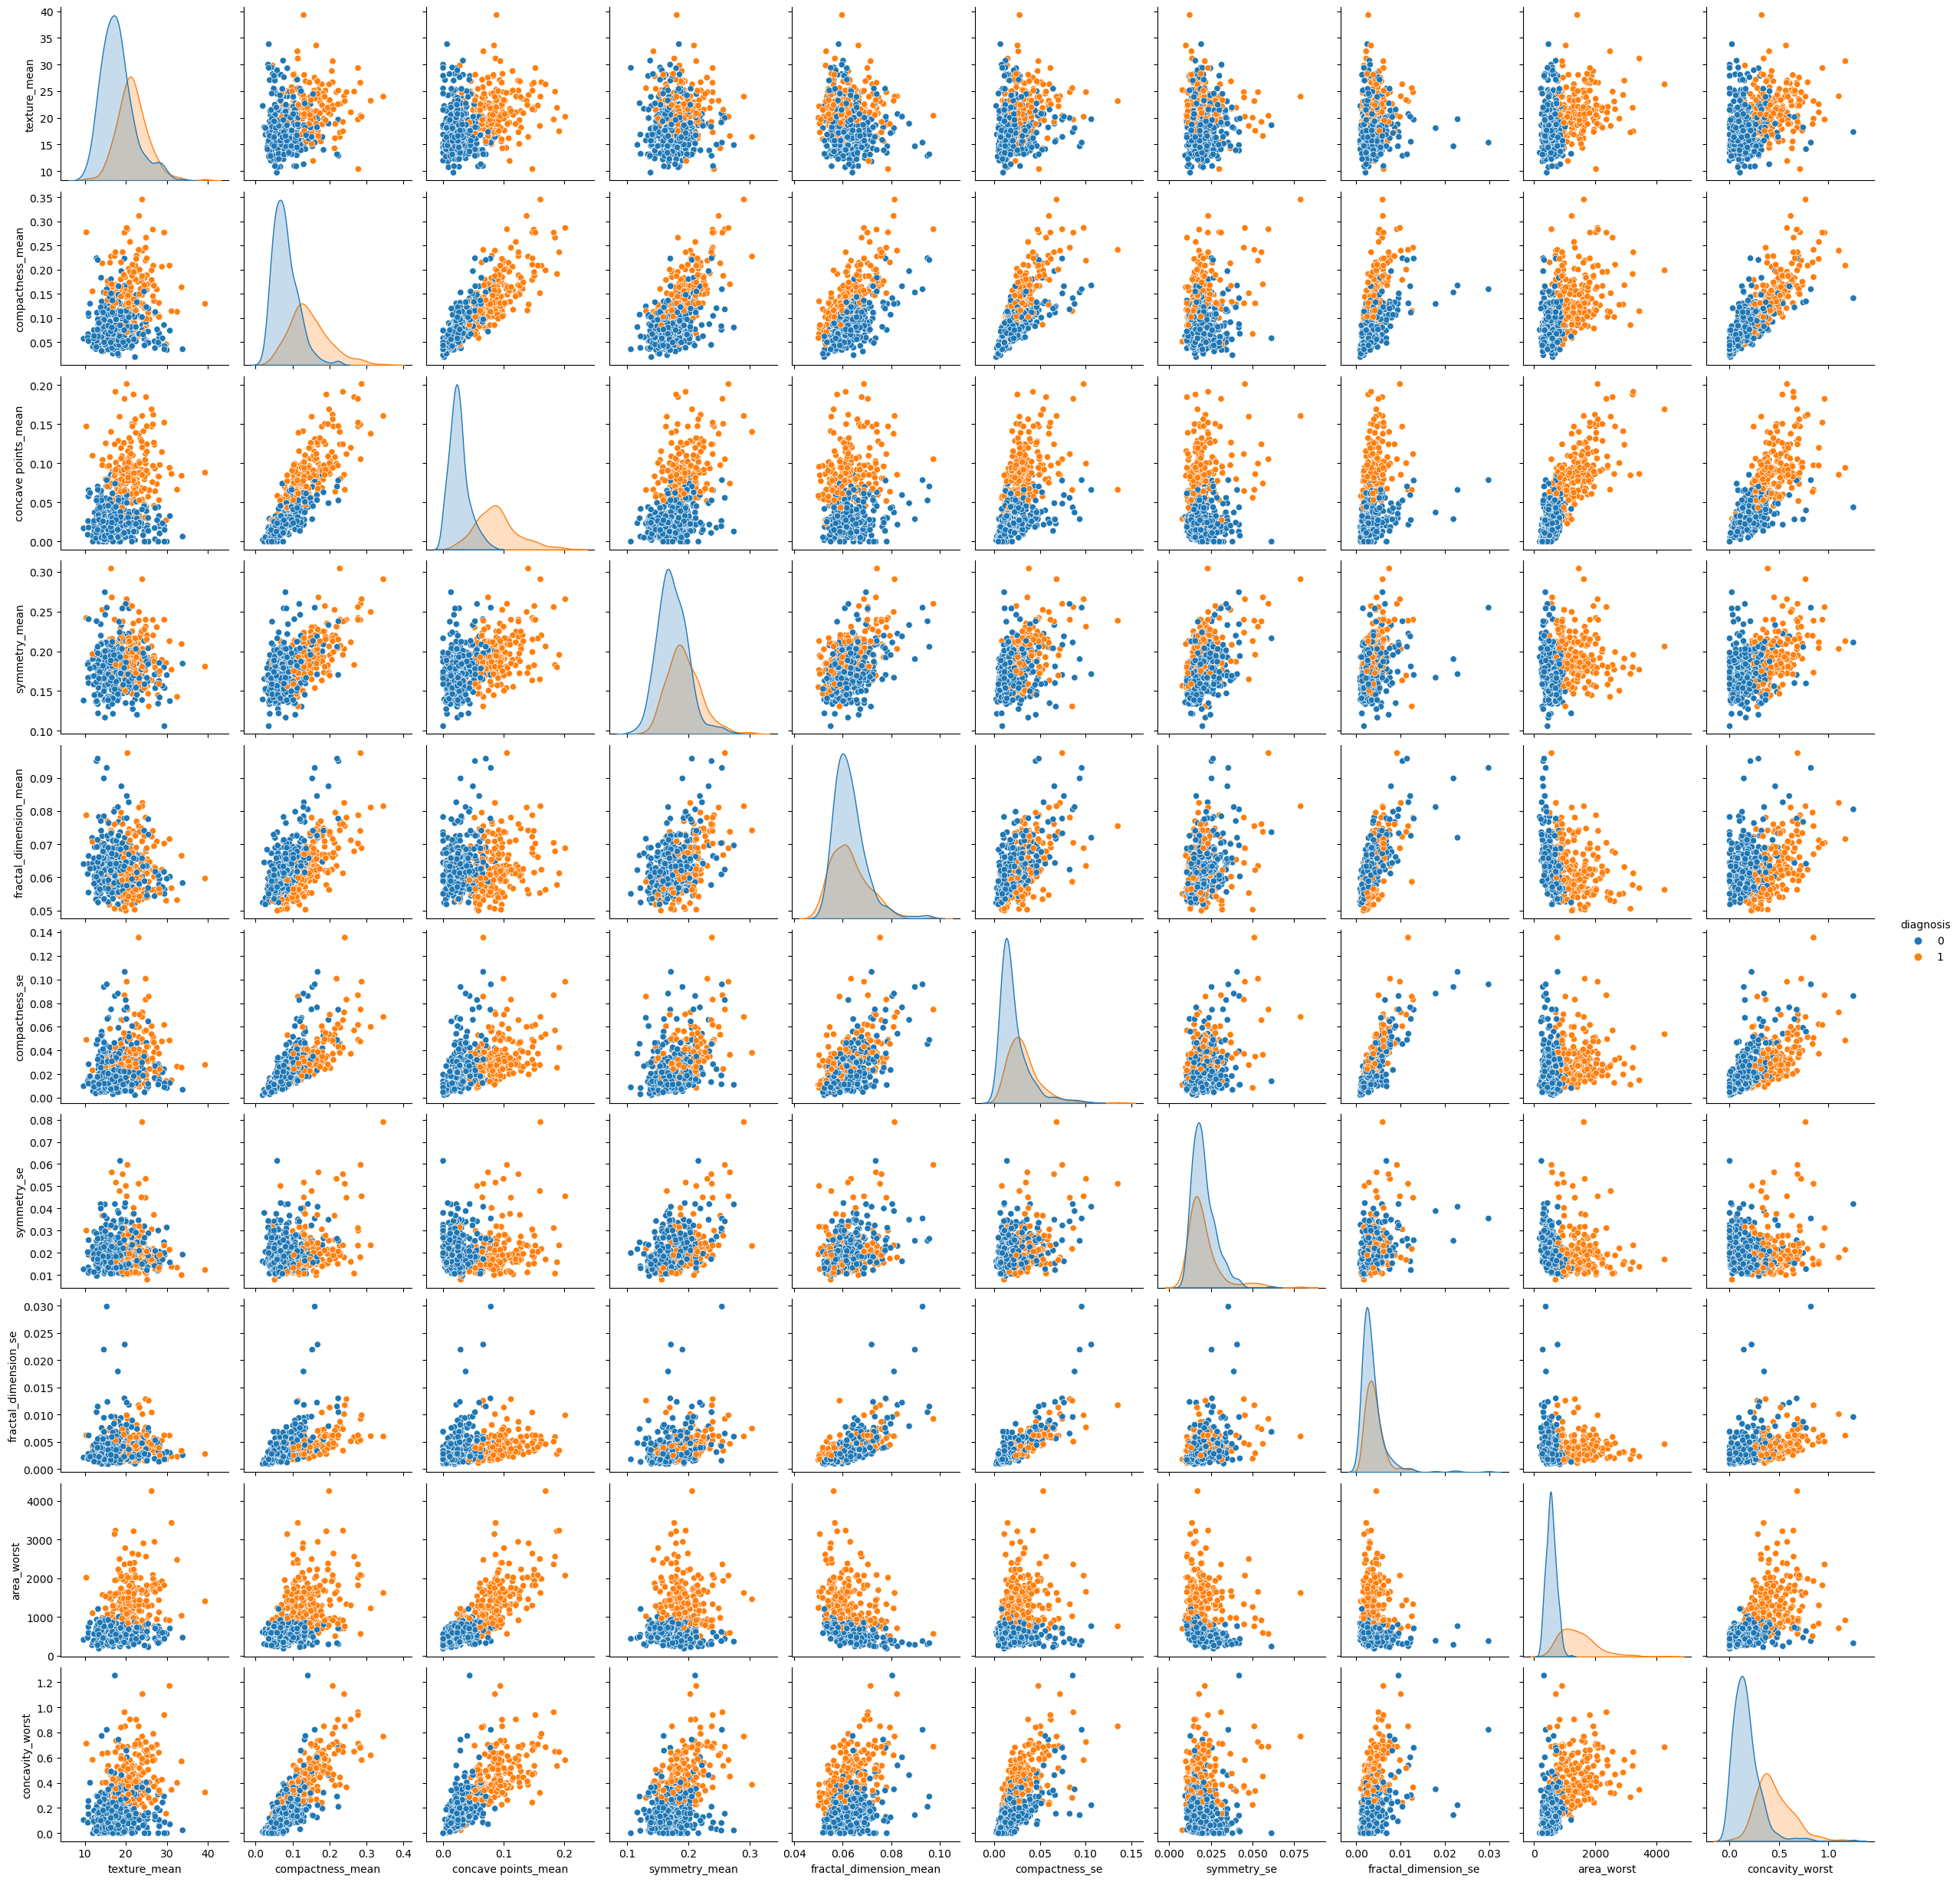

In [51]:
#sns.pairplot(data=df_cut, hue='diagnosis')

* Разделим датасет на тестовую и тренировочную выборки

In [13]:
df_train, df_test = train_test_split(df_cut, stratify=df_cut.iloc[:,0], test_size=0.3, random_state=1)

* Отшкалируем датасеты с помощью объекта StandardScaler()
* Важно обучить scaler на трейне, а не на тесте
* Поэтому используем метод fit_transform на df_train, чтоб обучить скалер и сразу отшкалировать тренировочную выборку
* А потом применяем метод transform к df_test, так данные из тестовой выборки не просочатся к скалеру

In [14]:
scaler = StandardScaler()
scaler_temp = scaler.fit_transform(df_train.iloc[:,1:])
columns = df_train.iloc[:,1:].columns
df_train[columns] = scaler_temp

scaler_temp = scaler.transform(df_test.iloc[:,1:])
columns = df_test.iloc[:,1:].columns
df_test[columns] = scaler_temp

* Глянем на распределение выбросов в стандартизированной выборке
* Выбросы есть, но оставим работу с ними на другой раз

<AxesSubplot: >

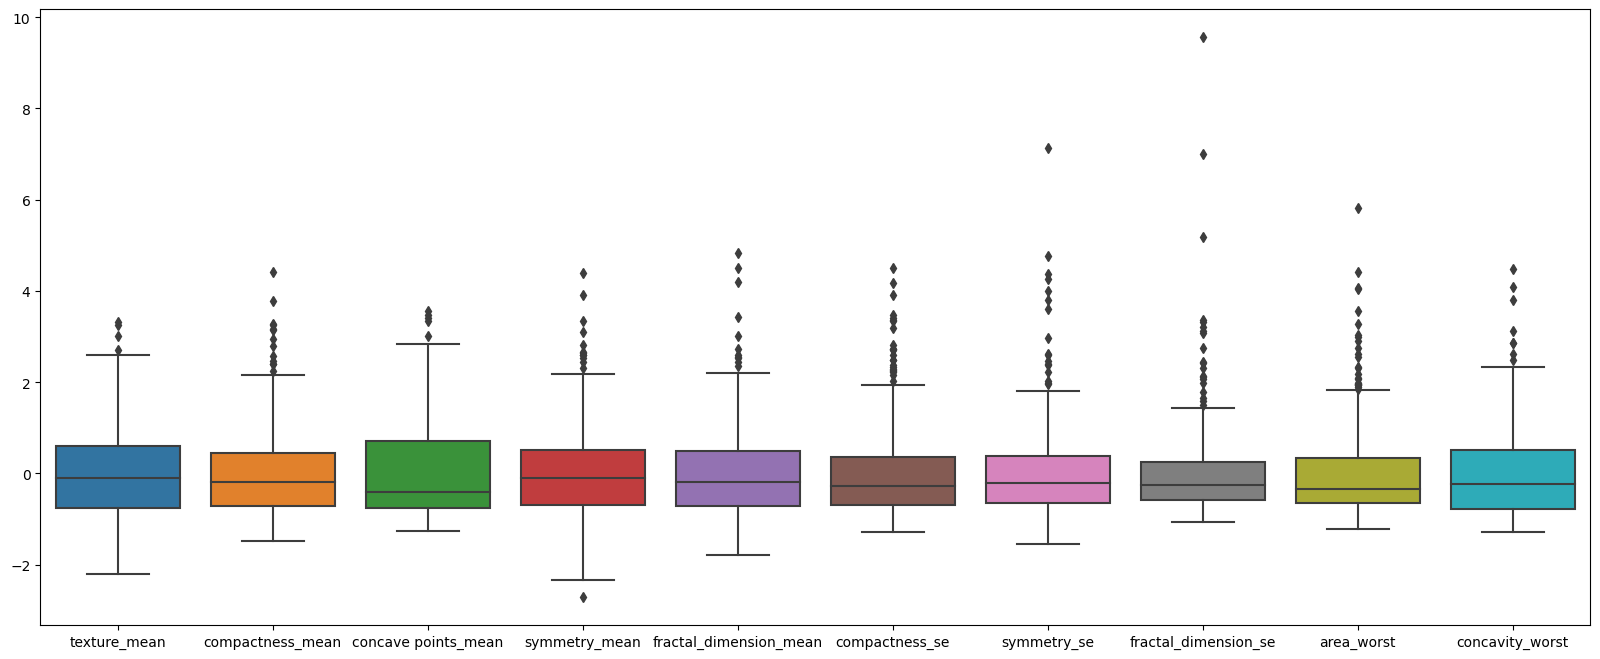

In [53]:
sns.boxplot(df_train.iloc[:,1:])

* Доразбиваем датасеты

In [16]:
X_train, X_test, y_train, y_test = df_train.iloc[:,1:], df_test.iloc[:,1:], df_train.iloc[:,0], df_test.iloc[:,0]

* Функция для вывода roc кривой

In [17]:
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    auc_score = roc_auc_score(actual, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

* Функция для вывода некоторых метрик

In [18]:
def print_metrics(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print(roc_auc_score(y_true, y_pred))
    plot_roc_curve(y_pred, y_true)

* Для начала сделаем baseline с простой логистической регрессией и стандартными параметрами
* Точность оказалось достаточно высокой

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

[[106   1]
 [  7  57]]
0.9406396028037384


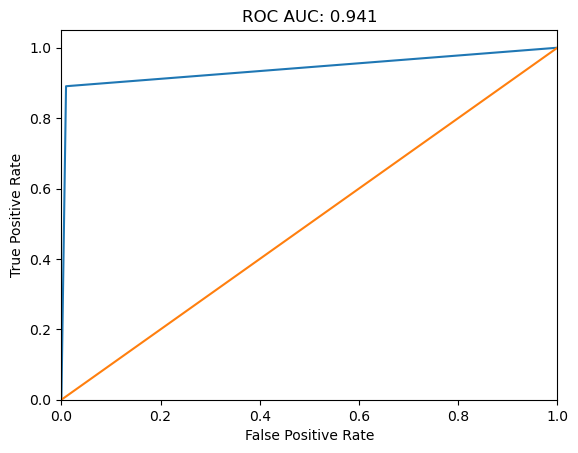

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_metrics(y_test, y_pred)

* Функция для вывода важности фичей в датасете

In [20]:
def importance(X, model):
    featureImportance = pd.DataFrame({"feature": X.columns, 
                                  "importance": model.coef_[0]})

    featureImportance.set_index('feature', inplace=True)
    featureImportance.sort_values(["importance"], ascending=False, inplace=True)
    plt.rcParams['figure.figsize']=(20,8)

    g=sns.barplot(featureImportance, x=featureImportance.index, y=featureImportance.importance)


In [56]:
X_train.columns

Index(['texture_mean', 'compactness_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'area_worst', 'concavity_worst'],
      dtype='object')

* Как видим, такие параметры как: area_worst, concave points_mean, concavity_worst, etc; имеют большое значение для определения класса опухоли: Злокачественная/Доброкачественная

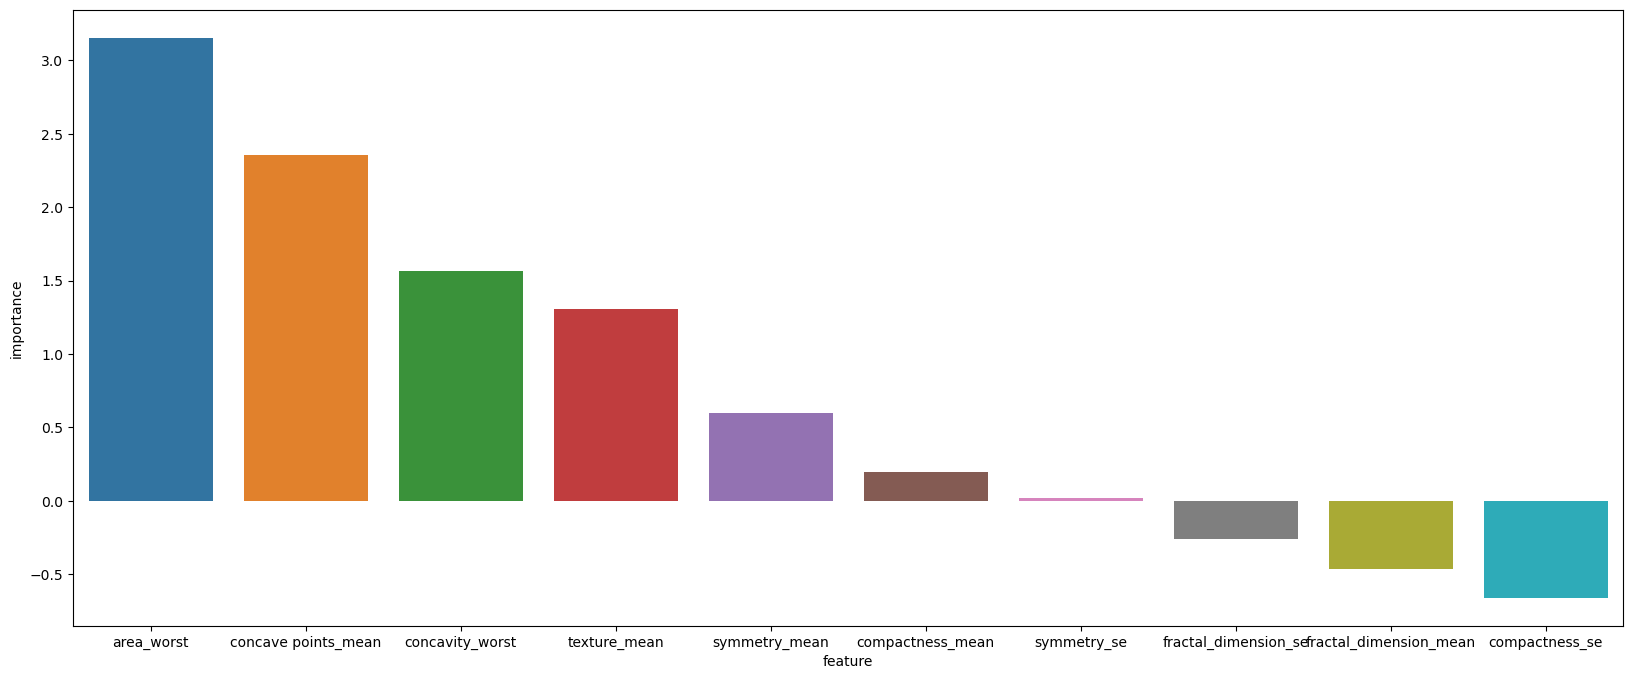

In [21]:
importance(X_train, model)

* Попробуем ЛогРег со стандартной кросс валидацией
* Видим, что результат не отличается от обычной ЛогРег

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

[[106   1]
 [  7  57]]
0.9406396028037384


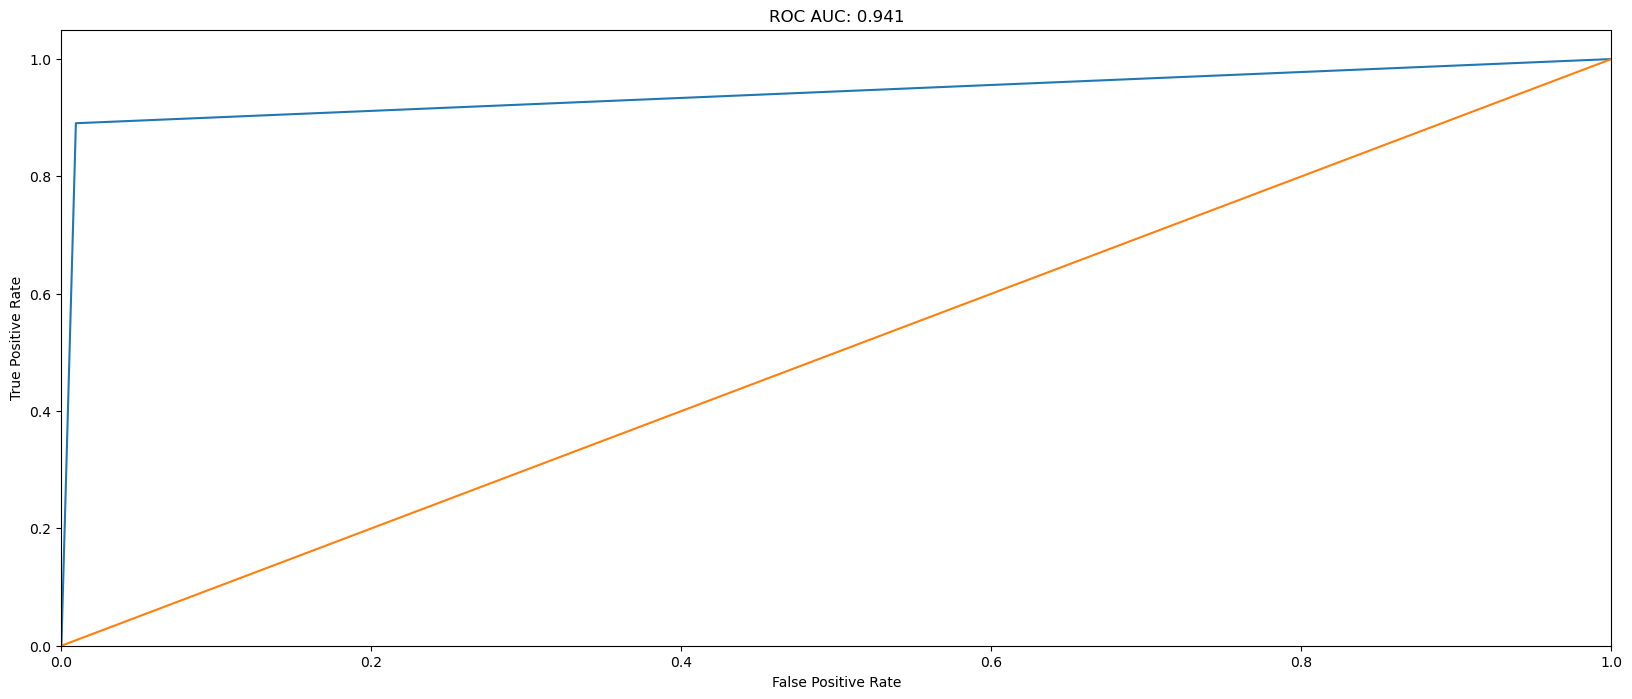

In [22]:
modelCV = LogisticRegressionCV(cv=100)
modelCV.fit(X_train, y_train)
y_pred = modelCV.predict(X_test)
print_metrics(y_test, y_pred)

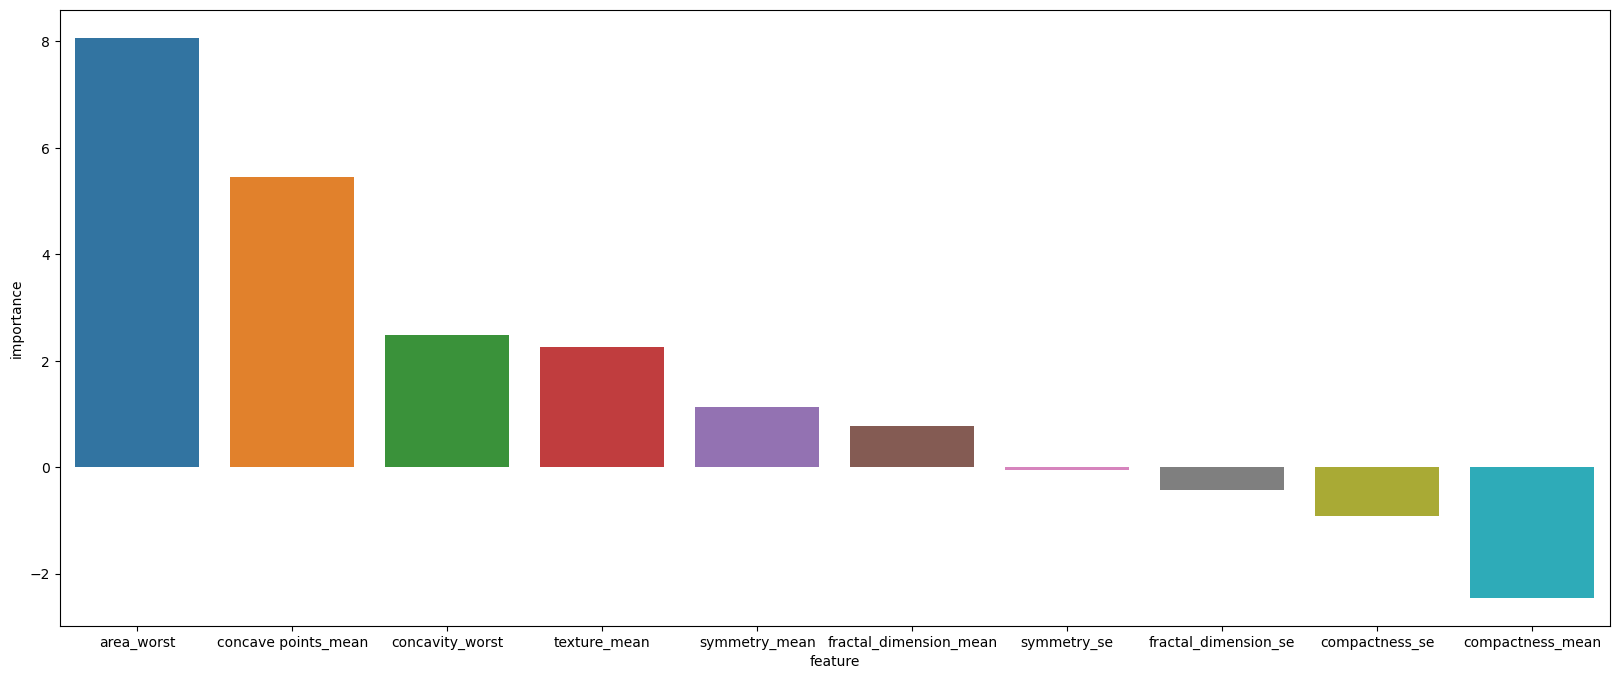

In [23]:
importance(X_train, modelCV)

* Попробуем GridSearchCV
* Результат остался таким же
* Нашли лучшие параметры для ЛогРег: коэффициент регуляризации - 2 и лучшая регуляризация - L2 (Лассо)
    * В теории, можно было оставить все фичи, а не сокращать до 11, и просто использовать Lasso регуляризацию
    * Она могла просто занулить все ненужные параметры, а оставить только самые полезные, возможно, которые оставили мы

The best params: {'C': 2, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

[[106   1]
 [  7  57]]
0.9406396028037384


c:\Games\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Games\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Games\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Games\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfg

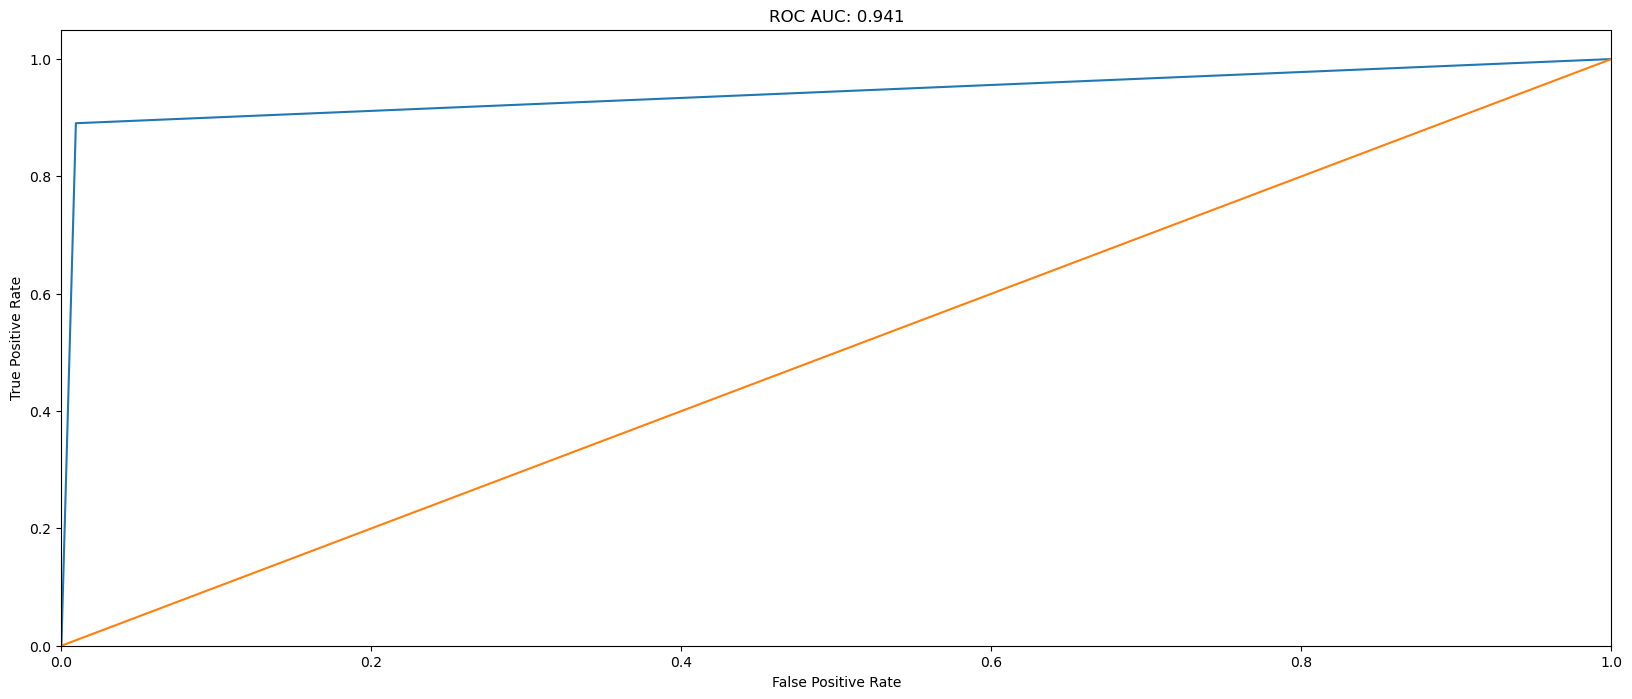

In [31]:
some_params = {'penalty': ('l1', 'l2', 'elasticnet'), 'C': (0.00001, 0.001, 0, 1, 2, 3, 4, 5, 6)}

dfa = LogisticRegression()
CVmodel = GridSearchCV(dfa, some_params, cv=10)

CVmodel.fit(X_train, y_train)
y_pred = CVmodel.predict(X_test)

print(f'The best params: {CVmodel.best_params_}')
print_metrics(y_test, y_pred)

* Сравним с методом ближайших соседей: Baseline second - kNN
* Удивительно, но без параметров, kNN работает лучше любой ЛогРегрессии

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

[[104   3]
 [  4  60]]
0.9547313084112149


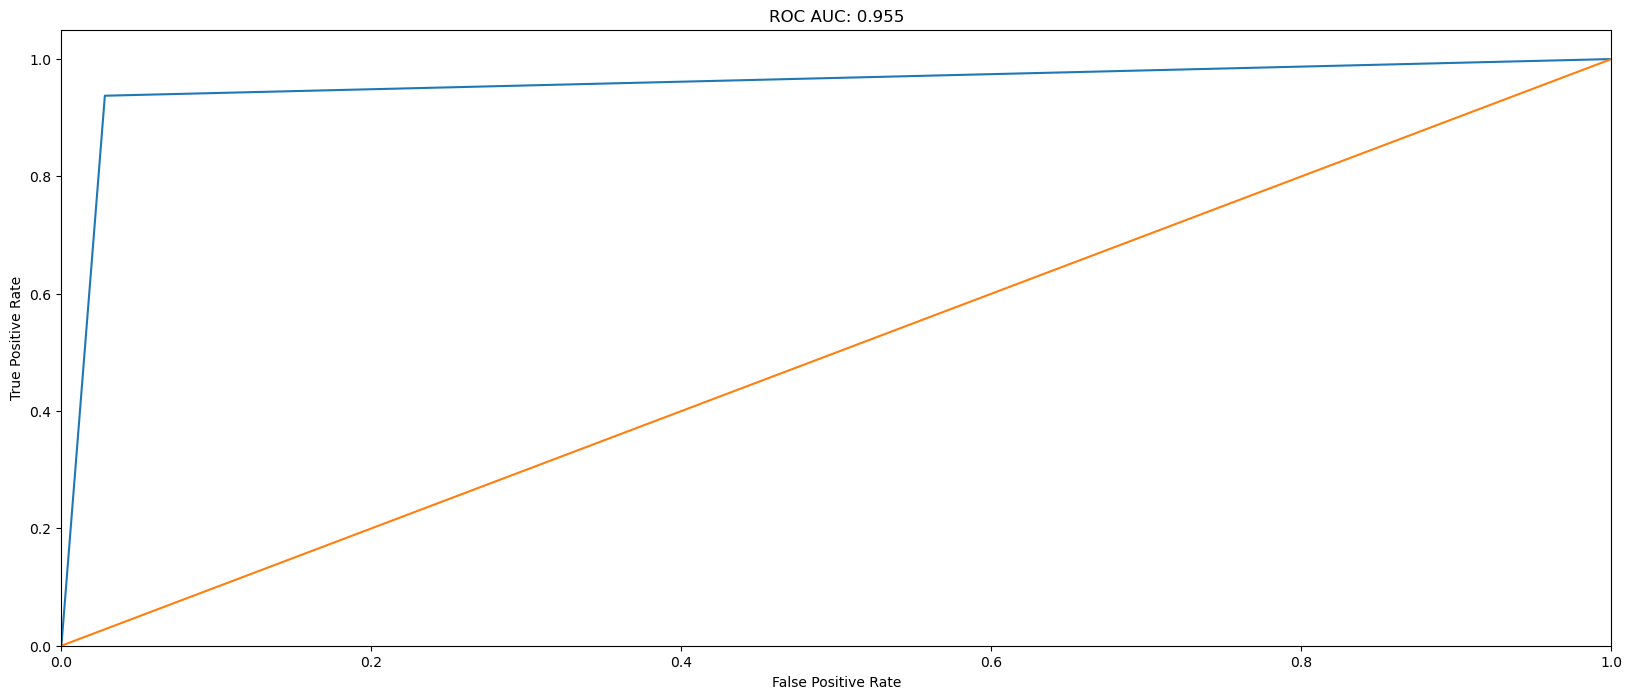

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test, y_pred)

* Попробуем кроссвалидацию на kNN
* Она не смогла найти лучший параметр, ведь точность алгоритма стала хуже, по сравнению с baseline second

The best params: {'n_neighbors': 9}
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

[[106   1]
 [  7  57]]
0.9406396028037384


c:\Games\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Games\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Games\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "c:\Games\miniconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Games\miniconda3\lib\site-packages\sklearn\util

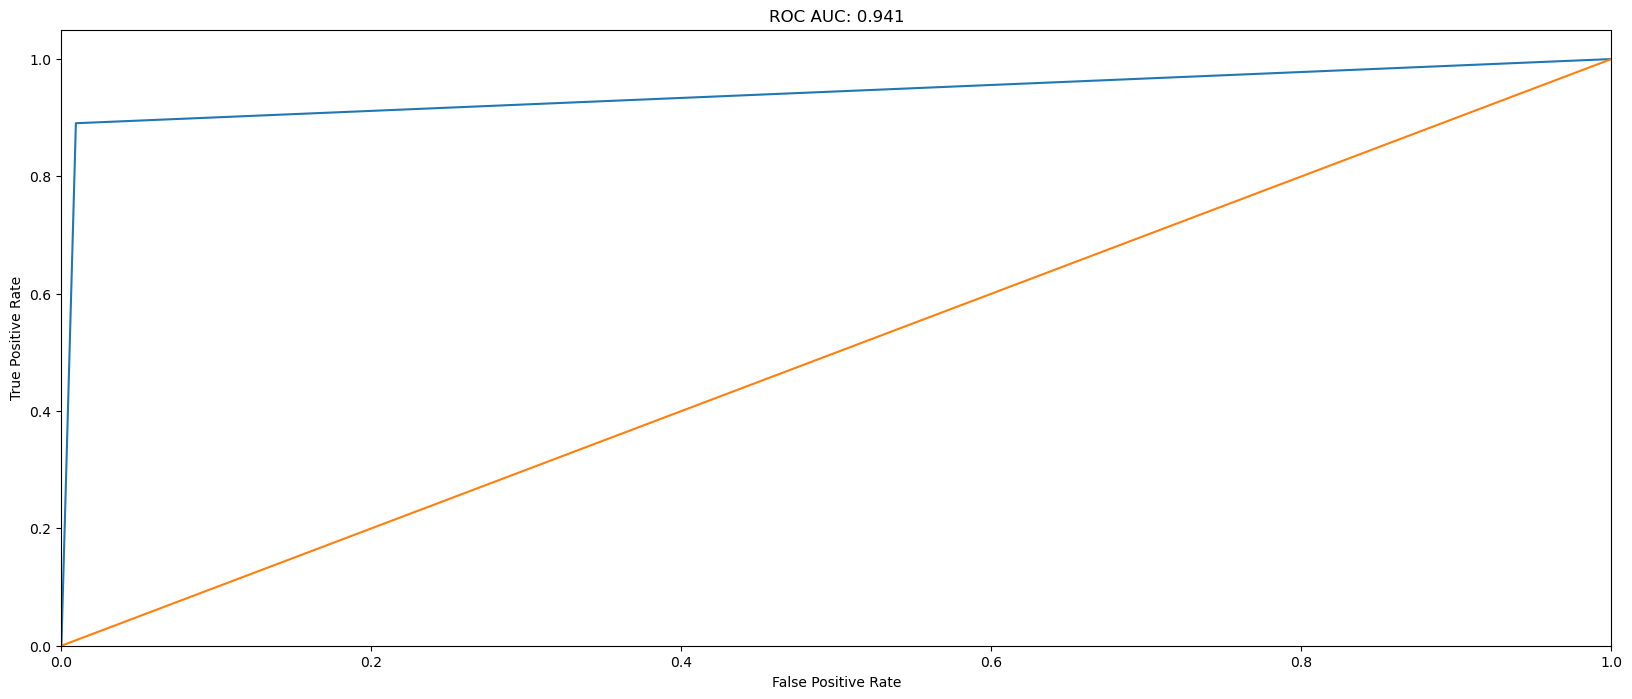

In [60]:
some_params = {'n_neighbors': list(range(200))}

CVmodel = GridSearchCV(knn, some_params, cv=10)

CVmodel.fit(X_train, y_train)
y_pred = CVmodel.predict(X_test)

print(f'The best params: {CVmodel.best_params_}')
print_metrics(y_test, y_pred)